**Date 620 HW 2**

Team: Farhana Zair, Sam Cohen-Devries, Joby John

**Description**

Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web
(such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges. 2- Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 3- Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information. 4- Please record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission.

In [15]:
# Loading libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

The dataset we are using is the 'Airports in the United States' dataset from https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat.

The dataset contains flights between US airports in 2002 (undirected), weighted by how many available seats where on flights between two airports over the course of the year.

Type of Data: Airport 1, Airport 2, number of seats across the entire year that were available

In [16]:
#Read in data 
df=pd.read_csv('USAirports.csv')
df.head()


,Source,Target,Weight
0,1,111,68150
1,1,49,110902
2,1,283,72020
3,1,177,220192
4,1,72,164951


In [17]:
#Reading edgelists
airport = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr=True)
print(type(airport))

<class 'networkx.classes.graph.Graph'>


In [18]:
# Printing info
print(nx.info(airport))

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 2980
Average degree:  11.9200


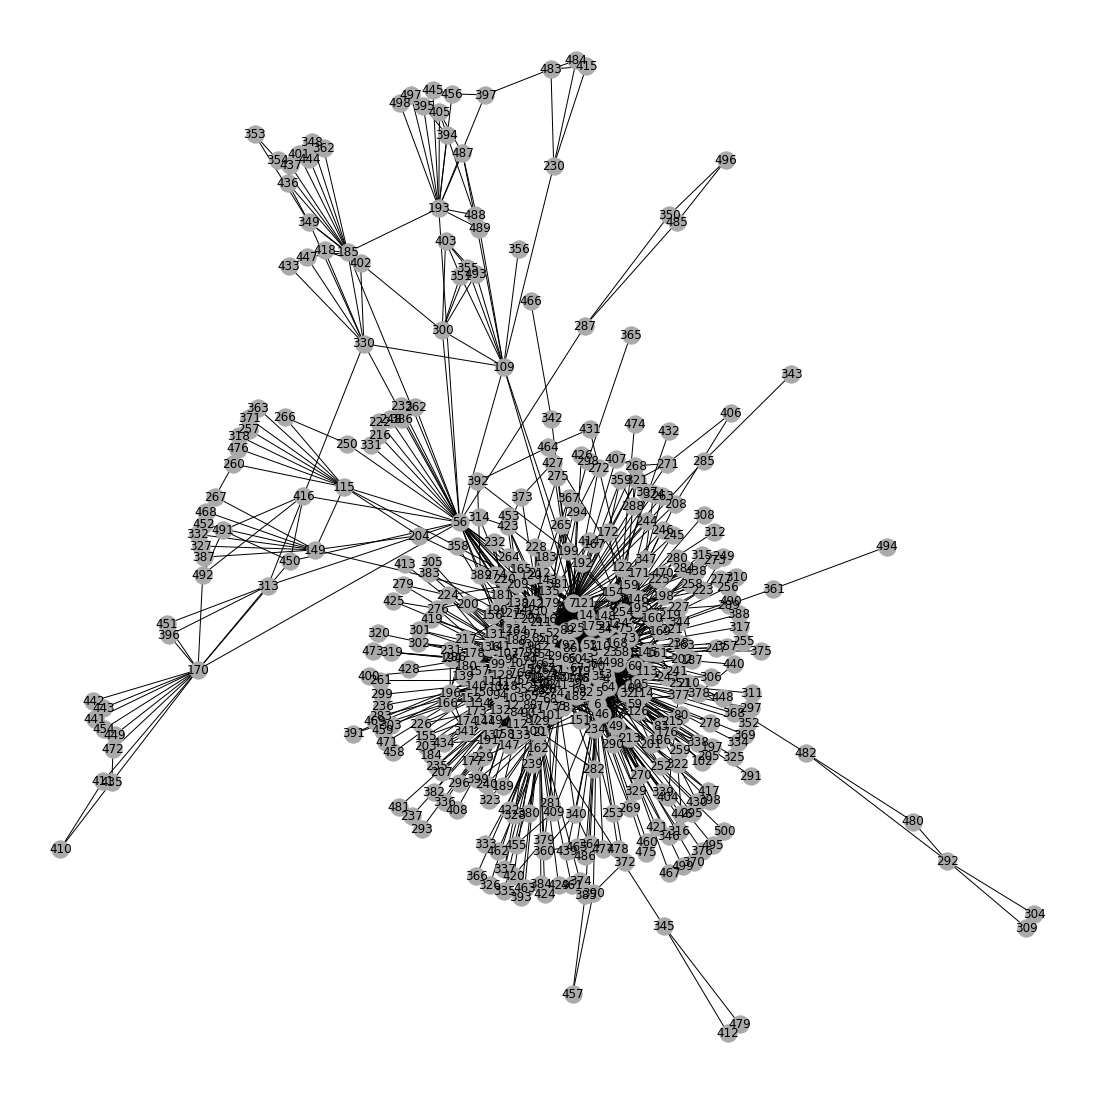

In [19]:
plt.figure(figsize=(15,15))
nx.draw(airport, with_labels=True, node_color="#AAAAAA")

In [20]:
# Calculating the diameter
print("The diameter of the graph is ", nx.diameter(airport))

The diameter of the graph is  7


The diameter is the greatest distance between any pair of vertices. To find the diameter of a graph, we first find the shortest path between each pair of vertices. The greatest length of any of these paths is the diameter of the graph.

This basically means we have to go through a maximum of 7 paths with regards to the longest path between any 2 nodes.`

In [21]:
#Calculate shortest path between 303 and 465
s_303_465 = nx.shortest_path(airport, 303, 465)
s_303_465


[303, 1, 6, 465]

We have calculated the shortest path between airports 303 and 465, which are on opposite sides in the diagram. We can see that the shortest path between these 2 airports includes 6 paths. This can be very useful information when booking flights.

We are now going to look at a subset and include only airports1 for the same analysis.

In [22]:
#Creating subset
df_10 = df[df["Source"] <= 1]
df_10
airport_10 = nx.from_pandas_edgelist(df_10, source="Source", target="Target", edge_attr=True)
#print graph info
print(nx.info(airport_10))

Name: 
Type: Graph
Number of nodes: 146
Number of edges: 145
Average degree:   1.9863


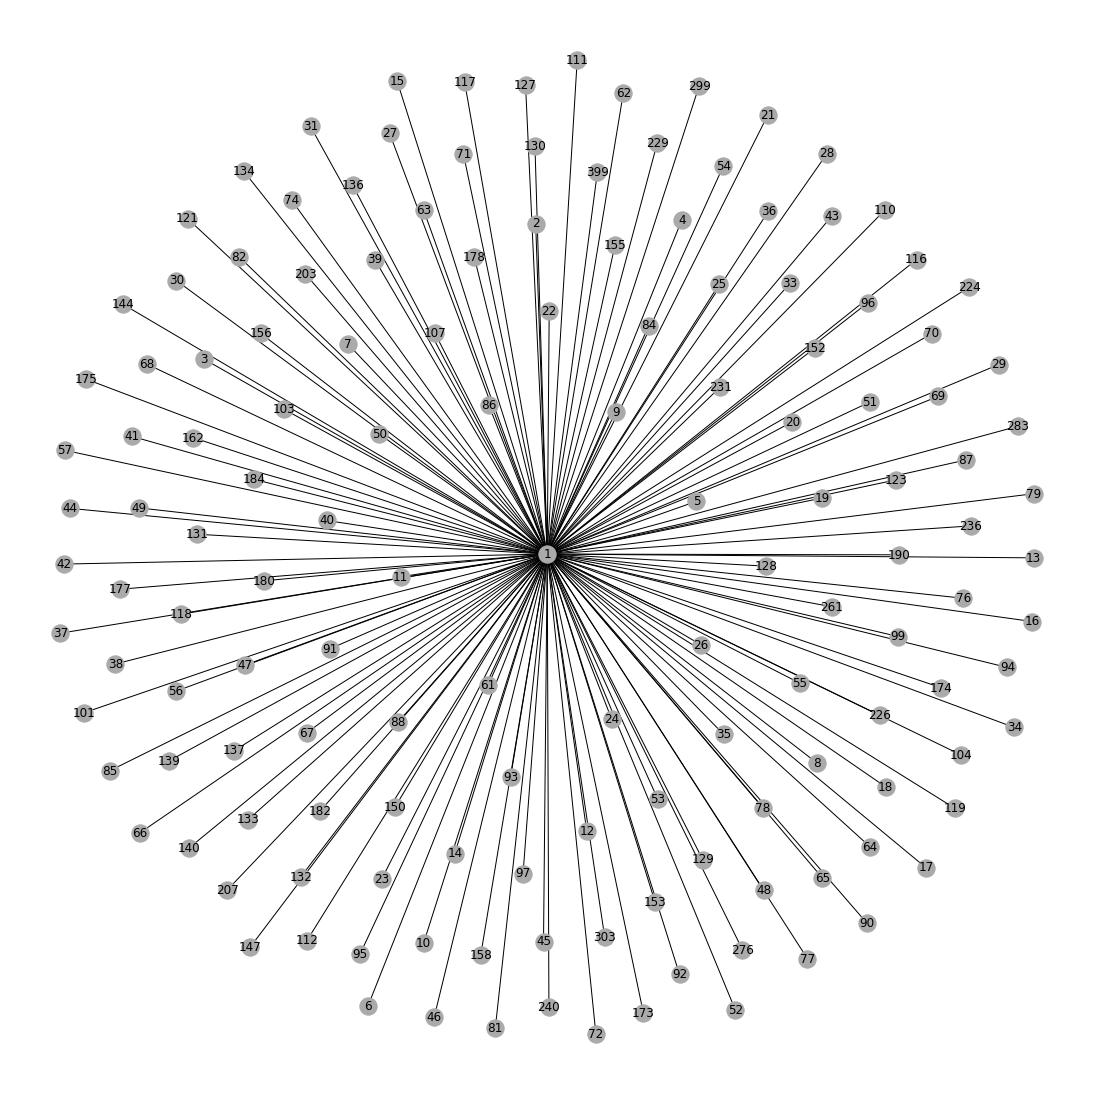

In [23]:
plt.figure(figsize=(15,15))
nx.draw(airport_10, with_labels=True, node_color="#AAAAAA")

Since we are looking at only 2 airports, the diagram represents two different clusters, with each airport being connected to all the other airports. 

In [24]:
# Calculating the diameter
print("The diameter of the graph is ", nx.diameter(airport_10))

The diameter of the graph is  2


The diameter, the longest of all the calculated path lengths, includes 3 paths. 

In [25]:
s_166_98 = nx.shortest_path(airport_10, 128, 26)
s_166_98

[128, 1, 26]

In [12]:
# Saving graphml file
nx.write_graphml(airport_10, 'airport.graphml')

**Project presentation**

https://www.youtube.com/watch?v=uFbf6BVQ_OI&feature=youtu.be